Saving hamspam.csv.csv to hamspam.csv (3).csv
Saving roc_data.csv to roc_data (3).csv


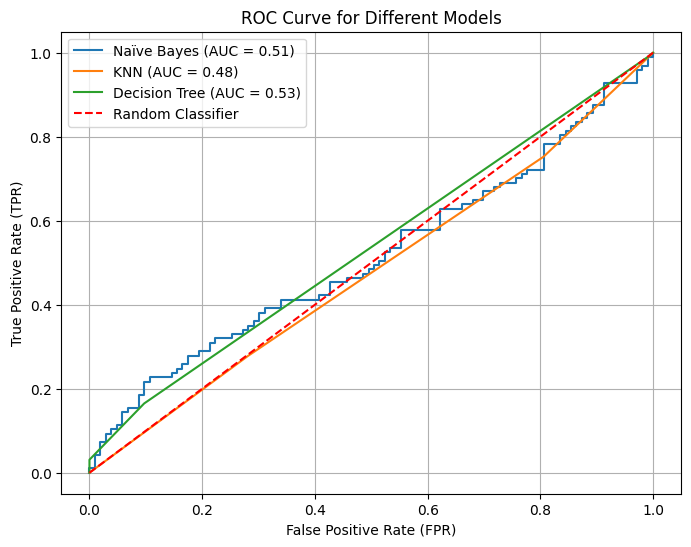

In [6]:
# Task 1b: Naïve Bayes and KNN Implementation in Google Colab

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


uploaded = files.upload()


hamspam_df = pd.read_csv("hamspam.csv.csv")
roc_data_df = pd.read_csv("roc_data.csv")


for column in hamspam_df.columns:
    if hamspam_df[column].dtype == 'object':
        hamspam_df[column] = LabelEncoder().fit_transform(hamspam_df[column])

X = hamspam_df.drop(columns=['Class'])
y = hamspam_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_probs = nb_classifier.predict_proba(X_test)[:, 1]


knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)
knn_probs = knn_classifier.predict_proba(X_test)[:, 1]


dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]

# Task 2b: ROC Curve and AUC Calculation

models = {'Naïve Bayes': nb_probs, 'KNN': knn_probs, 'Decision Tree': dt_probs}
plt.figure(figsize=(8, 6))

for model_name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Different Models")
plt.legend()
plt.grid()
plt.show()
